In [35]:
import numpy as np
import pandas as pd

mag = pd.read_csv('mag.csv').to_numpy()

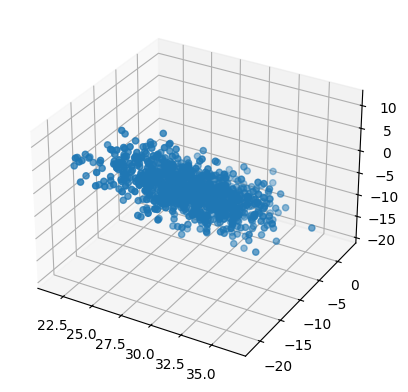

In [36]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(mag[:1000, 0], mag[:1000, 1], mag[:1000, 2])

In [37]:
def cost(x):
    x0, y0, z0, a, b, c = x
    
    cost = 0
    for i in range(mag.shape[0]):
        x, y, z = mag[i, :]
        radius = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2 + (z - z0)**2 / c**2)
        cost += (radius - 1)**2
        
    return cost

In [38]:
cost([1, 2, 3, 1, 2, 3])

27603141241.78913

In [39]:
mean_vector = np.mean(mag, axis=0)

x0 = np.random.rand(6)
x0[0:3] = mean_vector

mean_vector

array([4.31093178, 5.12471336, 6.78996731])

In [40]:
from scipy.optimize import minimize
result = minimize(cost, x0)

result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.0006122498803373857
        x: [-9.359e+04 -9.170e+04 -3.478e+01  1.350e+05 -1.273e+05
             2.573e+03]
      nit: 113
      jac: [-7.504e-05 -8.272e-05 -1.289e-04 -5.203e-05  5.960e-05
            -3.172e-06]
 hess_inv: [[ 1.009e+03  9.791e+02 ... -3.958e+01  7.389e-01]
            [ 9.791e+02  9.499e+02 ... -3.843e+01  7.171e-01]
            ...
            [-3.958e+01 -3.845e+01 ...  2.106e+00 -4.035e-02]
            [ 7.378e-01  7.177e-01 ... -4.102e-02  7.729e-04]]
     nfev: 1332
     njev: 190

In [41]:
result.success

False

In [42]:
result.message

'Desired error not necessarily achieved due to precision loss.'

In [43]:
mag

array([[ 33.3984375 ,  -0.5859375 , -11.71875   ],
       [ 29.00390625,   0.29296875, -14.0625    ],
       [ 31.0546875 ,   3.22265625, -10.83984375],
       ...,
       [ -0.29296875,  33.984375  , -15.234375  ],
       [ -1.7578125 ,  31.0546875 , -12.59765625],
       [ -0.        ,  31.640625  , -14.35546875]])